# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [4]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges,      # Usado para convertir la columna a un valor numerico
                                     errors='coerce')           # Si encuentra valores nulos los remplaza con un NaN (Not a Number)

## Manejo de datos nulos

In [5]:
df_data.isnull().sum()   # Miramos los valores nulos 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df_data.dropna(inplace=True)     # Borramos los valores nulos 

## Eliminar id

In [7]:
df_data.drop('customerID',axis=1,inplace=True)
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numérico variable objetivo

In [8]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [9]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [10]:
# Realizamos un one-hot encoding a todas las variables categoricas 
df_data_processing = pd.get_dummies(df_data_processing,
                                    dtype= 'int')           # Los resultados en datos numericos (1 o 0)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')  # Correlacion de los datos con la variable objetivo
plt.show()

## Escalabilidad de los datos

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el escalador
scaler = MinMaxScaler()

# Escalamos todos los datos (estos ya estan modificados a variables numericas)
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

# Creamos un nuevo dataframe con los datos escalados
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data_processing.columns   # Agregamos los nombres de las columnas 
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

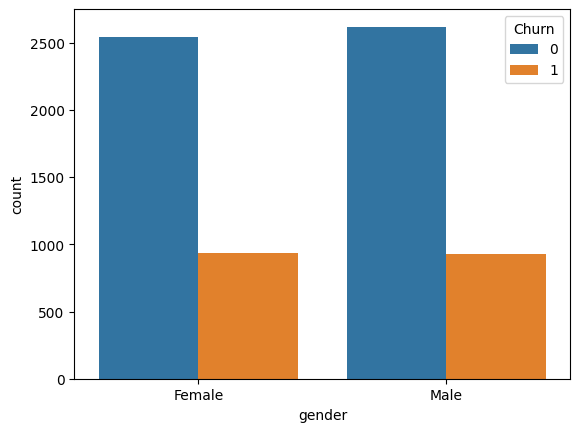

In [13]:
# usamos los datos originales para la exploracion de datos
import seaborn as sns
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [14]:
def plot_categorial(column):
    fig = plt.figure(figsize=(6,6))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [15]:
df_data.select_dtypes(include='object').columns 

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
column_cat = df_data.select_dtypes(include='object').columns     # Seleccionamos las columnas tipo "object" (son las variables categoricas)

for _ in column_cat:
    plot_categorial(_)

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Seleccionamos la data
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

# Splitamos la data de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Instanciamos el modelo y lo entrenamos
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Medimos el accuracy de nuestro modelo
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


In [88]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


# Cargar los datos del archivo CSV
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convertir la variable dependiente 'Churn' a valores binarios
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df.TotalCharges = pd.to_numeric(df.TotalCharges,      # Usado para convertir la columna a un valor numerica
                                     errors='coerce')           # Si encuentra valores nulos los remplaza con un NaN (Not a Number)

df.dropna(inplace=True)     # Borramos los valores nulos 


# Convertir las variables categóricas en dummies (0/1), excluyendo 'customerID'
df_dummies = pd.get_dummies(df.drop(['customerID'], axis=1), drop_first=True, dtype='int')

# Instanciamos el escalador
scaler = MinMaxScaler()

# Escalamos todos los datos (estos ya estan modificados a variables numericas)
df_data_processing_scaled =  scaler.fit_transform(df_dummies)

# Creamos un nuevo dataframe con los datos escalados
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_dummies.columns   # Agregamos los nombres de las columnas 


In [89]:


# Separar las variables independientes (X) y la dependiente (y)
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']



In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,SeniorCitizen,1.153220
1,tenure,7.584453
2,MonthlyCharges,866.089640
3,TotalCharges,10.811490
4,gender_Male,1.002106
5,Partner_Yes,1.462988
6,Dependents_Yes,1.381598
7,PhoneService_Yes,1773.528816
8,MultipleLines_No phone service,60.842267
9,MultipleLines_Yes,7.289761


In [91]:

vif_bajo = vif_data[vif_data.VIF <= 10]
X = X[vif_bajo.Variable.values]



In [92]:

# Reajustar el modelo
logit_model = sm.Logit(y, X)
resultado = logit_model.fit()

# Mostrar el resumen del modelo
print(resultado.summary())


Optimization terminated successfully.
         Current function value: 0.439493
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7016
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2410
Time:                        13:37:25   Log-Likelihood:                -3090.5
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
SeniorCitizen                             0.3446      

## Evaluación del modelo

In [20]:
model.predict_proba(X_test)

array([[0.99021177, 0.00978823],
       [0.86177511, 0.13822489],
       [0.30193031, 0.69806969],
       ...,
       [0.9902827 , 0.0097173 ],
       [0.70132399, 0.29867601],
       [0.82865289, 0.17134711]])

In [21]:
model.coef_

array([[ 2.16457074e-01, -3.10072686e+00, -1.62294409e-01,
         1.19636809e+00,  9.43608077e-04, -2.24731262e-02,
        -7.14903649e-02,  4.99608468e-02,  1.16813471e-01,
        -1.38342989e-01,  8.51176953e-02, -1.06647213e-01,
        -1.58852245e-01,  8.51176953e-02,  5.22050319e-02,
        -4.17807976e-01,  5.11414164e-01, -1.15135706e-01,
         2.40094500e-01, -1.15135706e-01, -1.46488312e-01,
         8.40804950e-02, -1.15135706e-01,  9.52569290e-03,
         5.65240120e-02, -1.15135706e-01,  3.70821759e-02,
         2.20220754e-01, -1.15135706e-01, -1.26614566e-01,
        -8.59168823e-02, -1.15135706e-01,  1.79523070e-01,
        -8.76592777e-02, -1.15135706e-01,  1.81265466e-01,
         7.42707687e-01, -9.75355974e-02, -6.66701608e-01,
        -1.13985197e-01,  9.24556789e-02, -2.72245228e-03,
        -1.58695526e-01,  2.16927142e-01, -7.70386812e-02]])

In [22]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


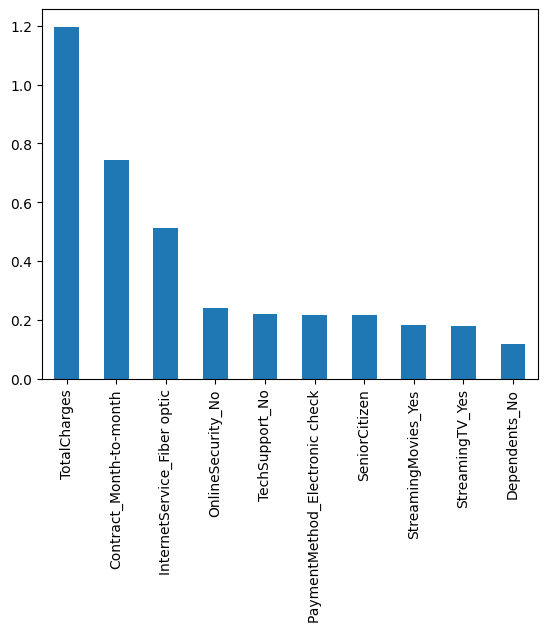

In [23]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


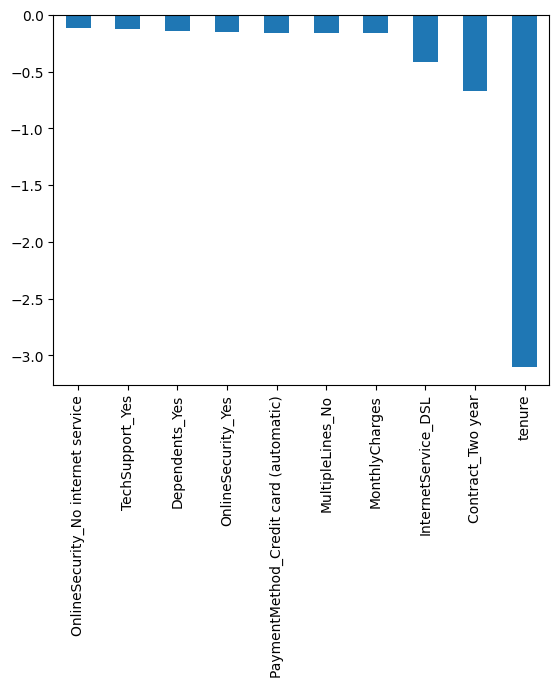

In [24]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

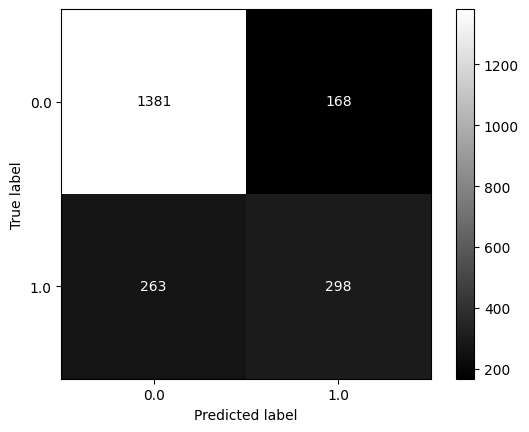

In [26]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()